In [1]:
# basics
import os, sys

# arrays
import numpy as np

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import load_cfsr, join_load_uhslc_tgs, load_moana_hindcast
from sscode.pca import PCA_DynamicPred
from sscode.linear import MultiLinear_Regression
from sscode.knn import KNN_Regression
from sscode.plotting.utils import plot_ccrs_nz

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ss = load_moana_hindcast()


 Loading the Moana v2 hindcast data... 



In [3]:
slp = load_cfsr(
    time='1D',load_winds=(True,None)
)[0]


 loading the sea-level-pressure fields... 


 resampling data to 1D... 


 projected winds will not be calculated... returning the SLP... 




 lets calculate the PCs... 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 41, 41) 


 calculated PCs matrix with shape: 
 (11353, 3362) 


 plotting 3 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



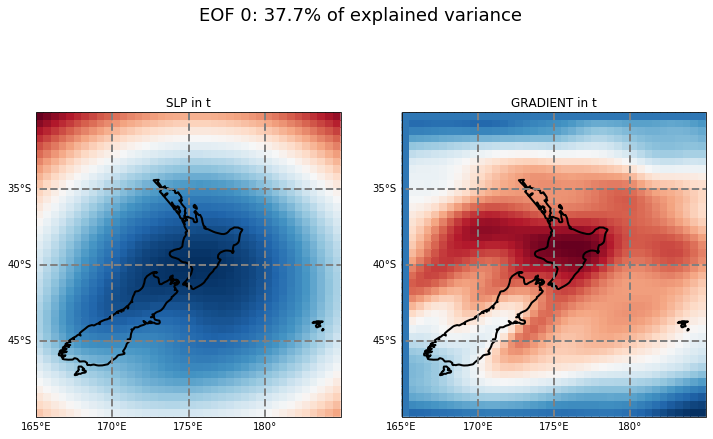

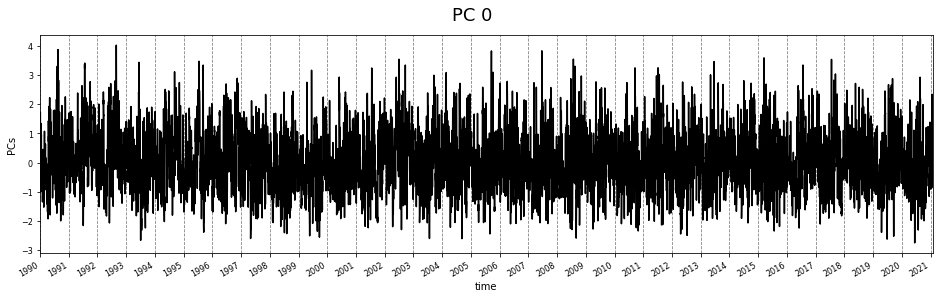

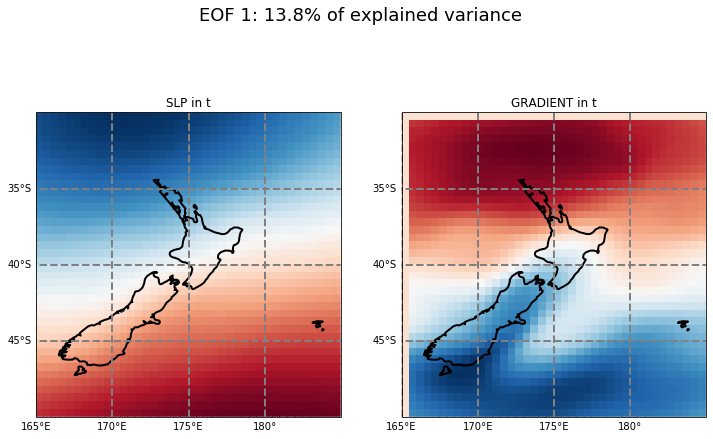

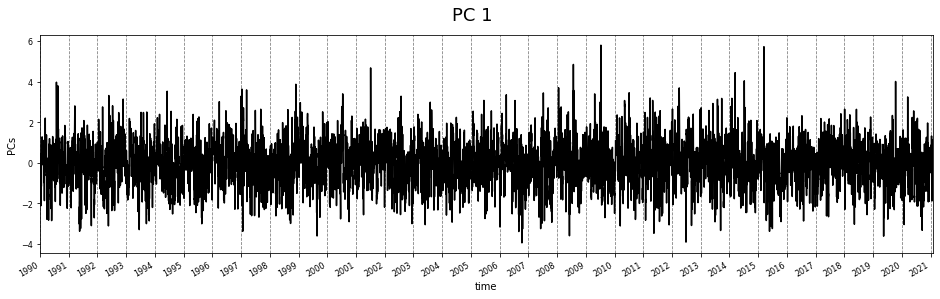

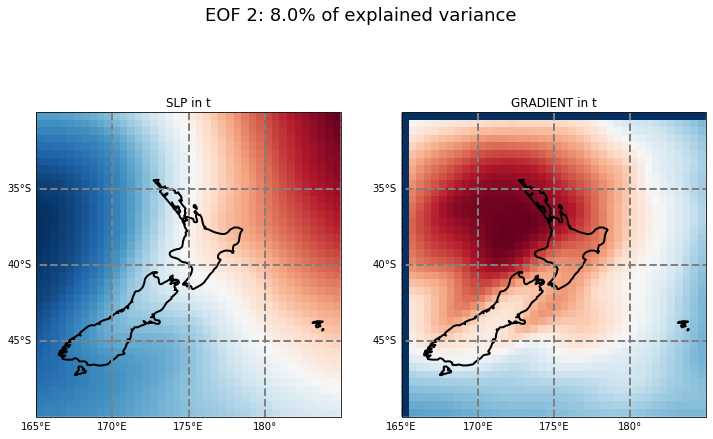

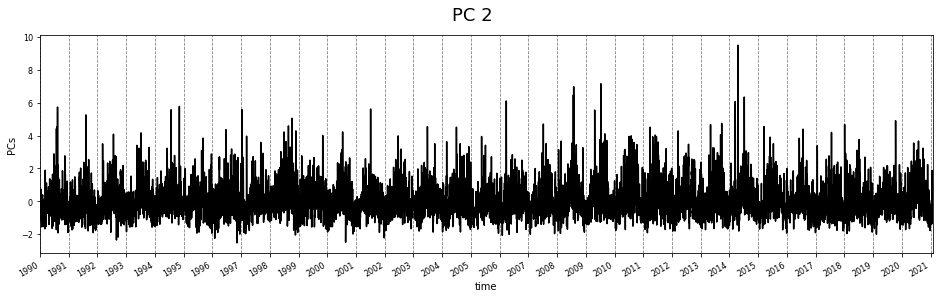

In [4]:
pcs_cfsr = PCA_DynamicPred(
    slp, pres_vars=('SLP','longitude','latitude'),
    calculate_gradient=True, winds=(False,None),
    time_lapse=1, # 1 equals to NO time delay 
    time_resample='1D' # ,region=(True,region)
)

In [5]:
pcs_cfsr

<xarray.Dataset>
Dimensions:   (n_components: 3362, n_features: 3362, n_lat: 41, n_lon: 41, time: 11353)
Coordinates:
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-30
Dimensions without coordinates: n_components, n_features, n_lat, n_lon
Data variables:
    PCs       (time, n_components) float64 -13.57 9.785 ... -1.178e-21 2.056e-21
    EOFs      (n_components, n_features) float64 -0.01237 -0.01277 ... 0.0 0.0
    variance  (n_components) float64 1.208e+03 441.3 ... 3.309e-41 4.298e-42
    pcs_lon   (n_lon) float32 165.0 165.5 166.0 166.5 ... 184.0 184.5 185.0
    pcs_lat   (n_lat) float32 -30.0 -30.5 -31.0 -31.5 ... -49.0 -49.5 -50.0

In [6]:
stats = []
sites = np.arange(0,len(ss.site.values),5) # vary the interval
for stat in sites:
    ss_tg = ss.sel(site=stat).load().resample(time='1D').max()
    stats_stat = MultiLinear_Regression(pcs_cfsr, ss_tg)
    stats.append(stats_stat)

Data comparison is -- BIAS: 0.00, SI: 0.70, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.74)
Data comparison is -- BIAS: 0.00, SI: 0.70, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.75)
Data comparison is -- BIAS: 0.00, SI: 0.70, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.75)
Data comparison is -- BIAS: 0.00, SI: 0.70, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.75)
Data comparison is -- BIAS: 0.00, SI: 0.70, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.75)
Data comparison is -- BIAS: 0.00, SI: 0.69, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.75)
Data comparison is -- BIAS: 0.00, SI: 0.70, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.77, 0.75)
Data comparison is -- BIAS: 0.00, SI: 0.73, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.76, 0.74)
Data comparison is -- BIAS: 0.00, SI: 0.65, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.80, 0.79)
Data comparison is -- BIAS: 0.00, SI: 0.65, RM

Data comparison is -- BIAS: -0.00, SI: 0.70, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.82, 0.81)
Data comparison is -- BIAS: 0.00, SI: 0.62, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.82, 0.81)
Data comparison is -- BIAS: -0.00, SI: 0.94, RMSE: 0.08
 and Correlation (Pearson, Spearman): (0.71, 0.70)
Data comparison is -- BIAS: 0.00, SI: 0.89, RMSE: 0.07
 and Correlation (Pearson, Spearman): (0.73, 0.71)
Data comparison is -- BIAS: 0.00, SI: 0.63, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.82, 0.81)
Data comparison is -- BIAS: -0.00, SI: 0.96, RMSE: 0.08
 and Correlation (Pearson, Spearman): (0.71, 0.69)
Data comparison is -- BIAS: 0.00, SI: 0.88, RMSE: 0.07
 and Correlation (Pearson, Spearman): (0.73, 0.72)
Data comparison is -- BIAS: -0.00, SI: 0.71, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.82, 0.81)
Data comparison is -- BIAS: 0.00, SI: 0.90, RMSE: 0.07
 and Correlation (Pearson, Spearman): (0.72, 0.71)
Data comparison is -- BIAS: 0.00, SI: 0.63

Data comparison is -- BIAS: -0.00, SI: 0.74, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.80, 0.79)
Data comparison is -- BIAS: 0.00, SI: 0.86, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.74, 0.73)
Data comparison is -- BIAS: 0.00, SI: 0.74, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.80, 0.79)
Data comparison is -- BIAS: 0.00, SI: 0.89, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.73, 0.72)
Data comparison is -- BIAS: -0.00, SI: 0.76, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.77, 0.77)
Data comparison is -- BIAS: -0.00, SI: 0.95, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.71, 0.71)
Data comparison is -- BIAS: -0.00, SI: 0.75, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.79, 0.79)
Data comparison is -- BIAS: -0.00, SI: 0.98, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.71, 0.70)
Data comparison is -- BIAS: -0.00, SI: 0.76, RMSE: 0.06
 and Correlation (Pearson, Spearman): (0.78, 0.78)
Data comparison is -- BIAS: -0.00, SI: 0

Data comparison is -- BIAS: 0.00, SI: 0.80, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.75, 0.73)
Data comparison is -- BIAS: -0.00, SI: 0.80, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.76, 0.73)
Data comparison is -- BIAS: 0.00, SI: 0.79, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.76, 0.73)
Data comparison is -- BIAS: 0.00, SI: 0.79, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.76, 0.73)
Data comparison is -- BIAS: -0.00, SI: 0.84, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.75, 0.74)
Data comparison is -- BIAS: 0.00, SI: 0.81, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.75, 0.73)
Data comparison is -- BIAS: 0.00, SI: 0.82, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.75, 0.72)
Data comparison is -- BIAS: -0.00, SI: 0.82, RMSE: 0.04
 and Correlation (Pearson, Spearman): (0.75, 0.71)
Data comparison is -- BIAS: -0.00, SI: 0.84, RMSE: 0.05
 and Correlation (Pearson, Spearman): (0.76, 0.75)
Data comparison is -- BIAS: -0.00, SI: 0.8

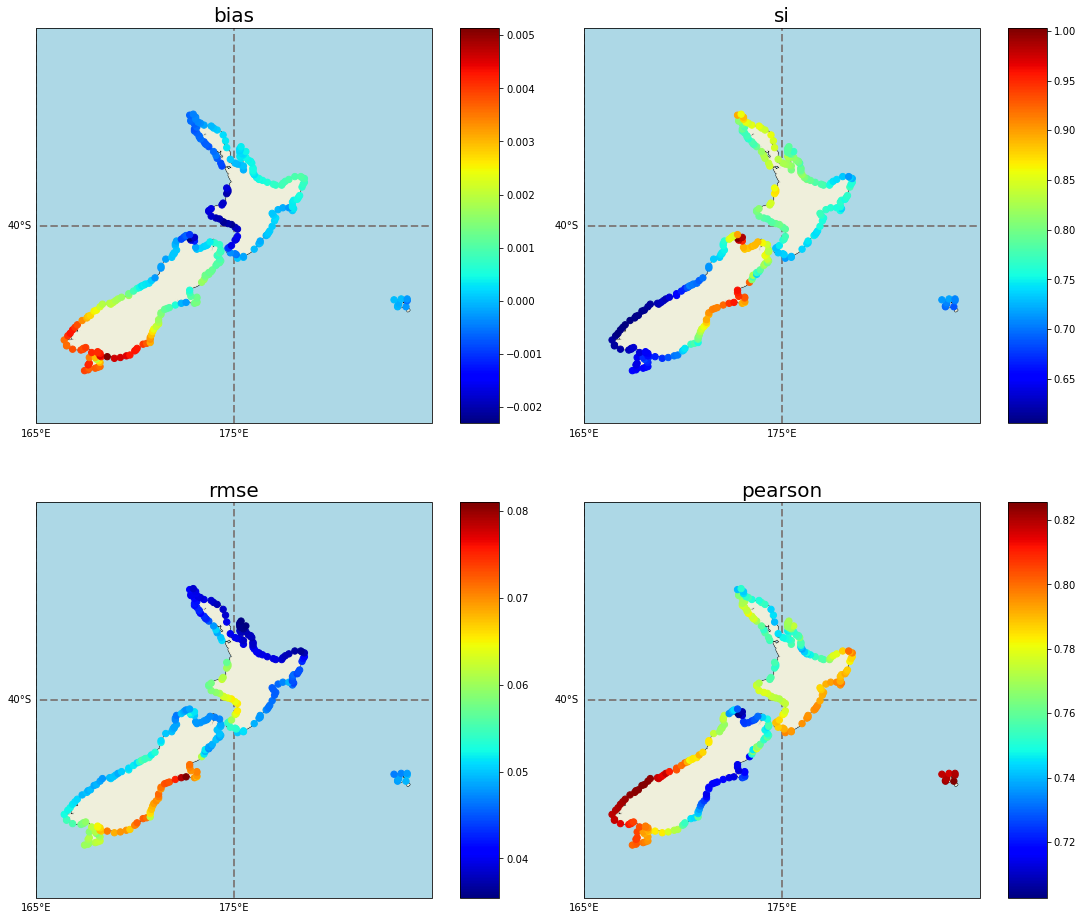

In [7]:
fig, axes = plt.subplots(
    ncols=2,nrows=2,figsize=(18,16),
    subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}
)
for i,var,ax in zip(range(4),['bias','si','rmse','pearson'],axes.flatten()):
    p = ax.scatter(ss.sel(site=sites).lon.values,
                   ss.sel(site=sites).lat.values,
                   c=np.array(stats)[:,i],
                   transform=ccrs.PlateCarree(),
                   s=40,zorder=40,cmap='jet')
    pos_ax = ax.get_position()
    pos_colbar = fig.add_axes([
        pos_ax.x0 + pos_ax.width + 0.01, pos_ax.y0, 0.03, pos_ax.height
    ])
    fig.colorbar(p,cax=pos_colbar)
    ax.set_facecolor('lightblue')
    ax.set_title(var,fontsize=20)
plot_ccrs_nz(axes.flatten(),plot_labels=[True,10,10])

In [8]:
sys.exit()

SystemExit: 

In [ ]:
knn = KNN_Regression(pcs_cfsr, ss_tg)

In [ ]:
knn.cv_results_

In [ ]:
sys.exit()

## Maximum likelihood parameters estimation

This is an example with each parameter depending on 2 PCs and a constant:
- bestx = [-0.03908617, 0.04326417, -0.01342341, 0.08552664, 0.00129292, 0.01053405, 0.03926688, -0.0235892, -0.02992359]

This is an example with epsilon constant:
- bestx = [-0.04302685, 0.1391113, 0.03944948, 0.02443369, 0.02891268, -0.01533266, 0.03045131]

In [ ]:
#---------------------------------------------------------------------------#
# PARAMETERS TO TUNE THE ALGORITHM
# Definition:
#   iseed  = the random seed number (for repetetive testing purpose;
#            pos integers)
#   iniflg = flag for initial parameter array (=1, included it in initial
#            population; otherwise, not included)
#   ngs =    number of complexes (sub-populations)
#   peps =   value of NORMALIZED GEOMETRIC RANGE needed for convergence
#   maxn =   maximum number of function evaluations allowed during 
#            optimization
#   kstop =  maximum number of evolution loops before convergency
#   pcento = the percentage change allowed in kstop loops before 
#            convergency
# Values:
iseed   = random.randint(0,10000)
iniflg  = 0
ngs     = 6
peps    = 0.01
maxn    = 3000
kstop   = 30
pcento  = 0.01
#------------------------------------------------------------------------#


# selection of the parameters for sceua
bl = np.ones(5) * -0.2
bu = np.ones(5) * +0.2
x0 = np.ones(5) * 0.01

# call the algorithm, that returns best likelihood and parameters
bestx, bestf, BESTX, BESTF, ICALL = sceua(x0,bl,bu,maxn,kstop,pcento,peps,
                                          ngs,iseed,iniflg,
                                          data=data)

In [ ]:
# return parameters, likelihood and AIC in this iteration
print('\n \n Parameters: ', bestx)
print('\n Likelihood: ', bestf)
print('\n')
# plot adjust
plot_parameters(BESTX, BESTF, ICALL)

In [ ]:
plot_adjust(bestx, data)